TO DO:
to present these results I can do a nice matrix (colored coded) with two axis: the y axis the training/definition corpus text length and the x axis the full corpus text length.

In [731]:
import pandas as pd
import numpy as np
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import preprocess_documents


df_5comp_MW = pd.read_csv('New_training_set_allsources_postNER.csv', sep=';')
df_5comp_MW_corpus = pd.read_csv('corpus_training_set.csv', sep=';')

text_corpus = df_5comp_MW['Text'].values
training_corpus = df_5comp_MW_corpus['Text'].values


for i in list(range(0,df_5comp_MW.shape[0])):
        text_corpus[i]=text_corpus[i][0:300]


for i in list(range(0,df_5comp_MW_corpus.shape[0])):
        training_corpus[i]=training_corpus[i][0:300]
        

print(df_5comp_MW.shape)
print(df_5comp_MW_corpus.shape)

df_5comp_MW.dropna(inplace = True)
df_5comp_MW_corpus.dropna(inplace = True)

print(df_5comp_MW.shape)
print(df_5comp_MW.head())
print(df_5comp_MW_corpus.shape)
print(df_5comp_MW_corpus.head())

(3111, 5)
(44, 5)
(1919, 5)
    Column1        Date                                           Headline  \
3       725  04/05/2018  BP eyes BHP Billiton energy asset deal: Bloomberg   
8       717  22/05/2018         BP to cut 540 jobs from upstream workforce   
14      706  21/06/2018  BP ends Woolworths deal after regulator opposi...   
16      701  25/06/2018  Judge dismisses climate-change lawsuit against...   
19      697  03/07/2018           ConocoPhillips, BP to swap energy assets   

                                                 Text  Category  
3   BP eyes BHP Billiton energy asset deal: Bloomb...       2.0  
8   BP to cut 540 jobs from upstream workforce. BP...       6.0  
14  BP ends Woolworths deal after regulator opposi...       2.0  
16  Judge dismisses climate-change lawsuit against...       3.0  
19  ConocoPhillips, BP to swap energy assets. Cono...       2.0  
(44, 5)
   Column1        Date                                           Headline  \
0      487  28/10/2020

In [732]:
df_5comp_MW_1 = df_5comp_MW.loc[df_5comp_MW['Category'] == 1]
df_5comp_MW_2 = df_5comp_MW.loc[df_5comp_MW['Category'] == 2]
df_5comp_MW_3 = df_5comp_MW.loc[df_5comp_MW['Category'] == 3]
df_5comp_MW_4 = df_5comp_MW.loc[df_5comp_MW['Category'] == 4]
df_5comp_MW_5 = df_5comp_MW.loc[df_5comp_MW['Category'] == 5]
df_5comp_MW_6 = df_5comp_MW.loc[df_5comp_MW['Category'] == 6]
df_5comp_MW_7 = df_5comp_MW.loc[df_5comp_MW['Category'] == 7]
df_5comp_MW_8 = df_5comp_MW.loc[df_5comp_MW['Category'] == 8]
df_5comp_MW_9 = df_5comp_MW.loc[df_5comp_MW['Category'] == 9]
df_5comp_MW_10 = df_5comp_MW.loc[df_5comp_MW['Category'] == 10]

df_5comp_MW_wo1 = df_5comp_MW.loc[df_5comp_MW['Category'] != 1]

print(df_5comp_MW_1.shape[0])
print(df_5comp_MW_2.shape[0])
print(df_5comp_MW_3.shape[0])
print(df_5comp_MW_4.shape[0])
print(df_5comp_MW_5.shape[0])
print(df_5comp_MW_6.shape[0])
print(df_5comp_MW_7.shape[0])
print(df_5comp_MW_8.shape[0])
print(df_5comp_MW_9.shape[0])

1430
76
72
61
64
26
12
10
168


In [733]:
df_5comp_MW_1_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 1]
df_5comp_MW_2_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 2]
df_5comp_MW_3_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 3]
df_5comp_MW_4_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 4]
df_5comp_MW_5_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 5]
df_5comp_MW_6_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 6]
df_5comp_MW_7_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 7]
df_5comp_MW_8_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 8]
df_5comp_MW_9_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 9]
df_5comp_MW_10_corpus = df_5comp_MW_corpus.loc[df_5comp_MW_corpus['Category'] == 10]

In [734]:
corpus_train_5comp_MW_lsi = {
    'Category': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], #'Stock Price Update', 'Deals/ M&A/ Partnerships', 'Lawsuits', 'Product', 'Analyst Recommendation', 'Employement', 'Facilities', 'Award', 'Financial (earnings etc.)', 'Other'],
    'Articles': [df_5comp_MW_1_corpus['Text'].iloc[1]+df_5comp_MW_1_corpus['Text'].iloc[2]+df_5comp_MW_1_corpus['Text'].iloc[3]+df_5comp_MW_1_corpus['Text'].iloc[4]+df_5comp_MW_1_corpus['Text'].iloc[0],
                 df_5comp_MW_2_corpus['Text'].iloc[1]+df_5comp_MW_2_corpus['Text'].iloc[2]+df_5comp_MW_2_corpus['Text'].iloc[3]+df_5comp_MW_2_corpus['Text'].iloc[4]+df_5comp_MW_2_corpus['Text'].iloc[0],
                 df_5comp_MW_3_corpus['Text'].iloc[1]+df_5comp_MW_3_corpus['Text'].iloc[2]+df_5comp_MW_3_corpus['Text'].iloc[3]+df_5comp_MW_3_corpus['Text'].iloc[4]+df_5comp_MW_3_corpus['Text'].iloc[0], 
                 df_5comp_MW_4_corpus['Text'].iloc[1]+df_5comp_MW_4_corpus['Text'].iloc[2]+df_5comp_MW_4_corpus['Text'].iloc[3]+df_5comp_MW_4_corpus['Text'].iloc[4]+df_5comp_MW_4_corpus['Text'].iloc[0], 
                 df_5comp_MW_5_corpus['Text'].iloc[1]+df_5comp_MW_5_corpus['Text'].iloc[2]+df_5comp_MW_5_corpus['Text'].iloc[3]+df_5comp_MW_5_corpus['Text'].iloc[4]+df_5comp_MW_5_corpus['Text'].iloc[0], 
                 df_5comp_MW_6_corpus['Text'].iloc[1]+df_5comp_MW_6_corpus['Text'].iloc[2]+df_5comp_MW_6_corpus['Text'].iloc[3]+df_5comp_MW_6_corpus['Text'].iloc[4]+df_5comp_MW_6_corpus['Text'].iloc[0], 
                 df_5comp_MW_7_corpus['Text'].iloc[1]+df_5comp_MW_7_corpus['Text'].iloc[2]+df_5comp_MW_7_corpus['Text'].iloc[3]+df_5comp_MW_7_corpus['Text'].iloc[4]+df_5comp_MW_7_corpus['Text'].iloc[0],
                 df_5comp_MW_8_corpus['Text'].iloc[1]+df_5comp_MW_8_corpus['Text'].iloc[2]+df_5comp_MW_8_corpus['Text'].iloc[3]+df_5comp_MW_8_corpus['Text'].iloc[0],
                 df_5comp_MW_9_corpus['Text'].iloc[1]+df_5comp_MW_9_corpus['Text'].iloc[2]+df_5comp_MW_9_corpus['Text'].iloc[3]+df_5comp_MW_9_corpus['Text'].iloc[4]+df_5comp_MW_9_corpus['Text'].iloc[0],
                 ""
                ]
}

corpus_df_5comp_MW_lsi = pd.DataFrame(corpus_train_5comp_MW_lsi, columns= ['Category','Articles'])

print(corpus_df_5comp_MW_lsi)

   Category                                           Articles
0         1  Marathon Petroleum Corp. stock falls Thursday,...
1         2  Qualcomm to Acquire Nuvia for About $1.4B. Bar...
2         3  Why Facebook is considering an antitrust lawsu...
3         4  Apple’s AirPods Could Be Pioneering a Whole Ne...
4         5  The Bull Case and the Bear Case on Apple Stock...
5         6  Big Tech is suffering from a ‘Great Resignatio...
6         7  Chinese factories grapple with power cuts. BEI...
7         8  Time’s ‘Most Influential’ list includes Tim Co...
8         9  BP earnings fall, but maintains quarterly divi...
9        10                                                   


In [735]:
text_corpus_5comp_MW_lsi = corpus_df_5comp_MW_lsi['Articles'].values

In [736]:
processed_corpus_5comp_MW_lsi = preprocess_documents(text_corpus_5comp_MW_lsi)
dictionary_5comp_MW_lsi = gensim.corpora.Dictionary(processed_corpus_5comp_MW_lsi)
bow_corpus_5comp_MW_lsi = [dictionary_5comp_MW_lsi.doc2bow(text) for text in processed_corpus_5comp_MW_lsi]

In [737]:
tfidf_5comp_MW_lsi = gensim.models.TfidfModel(bow_corpus_5comp_MW_lsi, smartirs="npu")
corpus_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[bow_corpus_5comp_MW_lsi]

In [738]:
#big_matrix=np.zeros((660,9))
#print(big_matrix.shape)
#c=0
#for tuple_vector in corpus_tfidf_5comp_MW_lsi:
    
    #print(tuple_vector)
    #print("HELLOOOOOOOOO")
#    for i in tuple_vector:
        #print(i[1])
#        big_matrix[i[0],c]=i[1]
        
#    c=c+1
    
    
#print(big_matrix.shape)
#print(big_matrix)

#df_corr = pd.DataFrame (big_matrix, columns= ['Stock Price Update', 'Deals, M&A, Partnerships', 'Lawsuits', 'Product', 'Analyst Recommendation', 'Employement', 'Facilities', 'Award', 'Financial (earnings etc.)'])
#df=df_corr[df_corr.columns[[0,8,1,2,3,4,5,6,7]]]
#print(df.head())

#corr_matrix=df.corr().round(2)
#plt.figure()
#sns.heatmap(abs(corr_matrix), annot=True, vmax=0.25, vmin=0, cmap='Blues')
#plt.show()


In [739]:
lsi_5comp_MW = gensim.models.LsiModel(corpus_tfidf_5comp_MW_lsi, num_topics=9)
index_5comp_MW_lsi = gensim.similarities.MatrixSimilarity(lsi_5comp_MW[corpus_tfidf_5comp_MW_lsi])

In [740]:
#print(df_5comp_MW_2["Text"].iloc[6])
new_doc_5comp_MW_lsi="apple sees plummets in consummer confidence after some things happen"

new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:10]:
    print(f"{corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")

9 : 0.99417275
5 : 7.450581e-09
1 : 0.0
2 : 0.0
3 : 0.0
7 : 0.0
10 : 0.0
8 : -4.656613e-10
4 : -1.8626451e-09
6 : -4.1909516e-09


In [741]:
#ACCURACY FOR ARTICLES CLASSIFICATION (ALL CATEGORIES)

total_articles = df_5comp_MW.shape[0]
print(total_articles-44)
correct=0
categories=[0,0,0,0,0,0,0,0,0]

for index, row in df_5comp_MW.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
print(categories)  
#the size of the corpus set is 44 articles, so for these we assume it will get them correctly with aprox. 100% of probability
print((correct-44)/(total_articles-44))
acc0=(correct-44)/(total_articles-44)

1875
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 5.0 and found category: 9 : 0.9390305
correct
correct
correct
correct
Correct category: 2.0 and found category: 5 : 0.6350759
correct
correct
correct
Correct category: 7.0 and found category: 2 : 0.8613029
correct
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 5 : 0.6879965
correct
correct
correct
correct
Correct category: 9.0 and found category: 5 : 0.79268324
Correct category: 2.0 and found category: 9 : 0.7111746
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 5.0 and found category: 2 : 0.5050134
Correct category: 2.0 and found category: 7 : 0.99468595
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
c

Correct category: 6.0 and found category: 9 : 0.81927776
correct
correct
correct
correct
Correct category: 3.0 and found category: 5 : 0.8981149
correct
correct
correct
correct
Correct category: 1.0 and found category: 5 : 0.9012294
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 1.0 and found category: 9 : 0.9545813
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 3 : 0.6621514

correct
Correct category: 5.0 and found category: 9 : 0.93813103
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 1 : 0.70009845
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 6.0 and found category: 9 : 0.7404634
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 6.0 

In [742]:
#ACCURACY FOR ARTICLES CLASSIFICATION (without category 1 (stock price update))

total_articles = df_5comp_MW_wo1.shape[0]
print(total_articles-39)
correct=0
categories=[0,0,0,0,0,0,0,0,0]

for index, row in df_5comp_MW_wo1.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-39)/(total_articles-39))

450
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 5.0 and found category: 9 : 0.9390305
correct
correct
correct
correct
Correct category: 2.0 and found category: 5 : 0.6350759
correct
correct
correct
Correct category: 7.0 and found category: 2 : 0.8613029
correct
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 5 : 0.6879965
correct
correct
correct
correct
Correct category: 9.0 and found category: 5 : 0.79268324
Correct category: 2.0 and found category: 9 : 0.7111746
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 5.0 and found category: 2 : 0.5050134
Correct category: 2.0 and found category: 7 : 0.99468595
correct
correct
Correct category: 5.0 and found category: 1 : 0.990416
correct
correct
Correct category: 5.0 and found category: 9 : 0.8000866
correct
correct
correct
Correct category: 2.0 and found category: 7 : 0.88873243
Correct ca

Correct category: 6.0 and found category: 9 : 0.7929736
Correct category: 6.0 and found category: 9 : 0.72851044
correct
Correct category: 4.0 and found category: 5 : 0.6824441
Correct category: 4.0 and found category: 7 : 0.8036708
correct
Correct category: 4.0 and found category: 5 : 0.60333645
correct
Correct category: 4.0 and found category: 2 : 0.68137944
Correct category: 4.0 and found category: 2 : 0.9555035
Correct category: 4.0 and found category: 9 : 0.66975844
correct
Correct category: 4.0 and found category: 5 : 0.8516983
Correct category: 4.0 and found category: 2 : 0.71218264
Correct category: 2.0 and found category: 7 : 0.6808959
correct
correct
Correct category: 2.0 and found category: 4 : 0.73352325
Correct category: 4.0 and found category: 2 : 0.9645069
correct
correct
Correct category: 2.0 and found category: 4 : 0.7183137
correct
correct
correct
correct
Correct category: 9.0 and found category: 4 : 0.83039737
correct
Correct category: 3.0 and found category: 5 : 0.6

In [743]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 1 (stock price update))

total_articles = df_5comp_MW_1.shape[0]
print(total_articles-5)
correct=0
categories=[-5,0,0,0,0,0,0,0,0]

for index, row in df_5comp_MW_1.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc1=(correct-5)/(total_articles-5)
print(categories)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

1425
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
cor

correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 1.0 and found category: 9 : 0.76866776
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 1.0 and found category: 9 : 0.6780583
Correct categor

In [744]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 9: Financial

total_articles = df_5comp_MW_9.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,0,0,0,0,-5]

for index, row in df_5comp_MW_9.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
acc2=(correct-5)/(total_articles-5)
print((correct-5)/(total_articles-5))
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

163
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 5 : 0.6879965
correct
correct
Correct category: 9.0 and found category: 5 : 0.79268324
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 5 : 0.7058548
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 5 : 0.8861494
correct
correct
correct
correct
correct
Correct category: 9.0 and found category: 3 : 0.73962176
correct
Correct category: 9.0 and found category: 4 : 0.80347
Correct category: 9.0 and found category: 1 : 0.81535435
correct
correct
correct
Correct category: 9.0 and found category: 2 : 0.6739531
Correct category: 9.0 and found category: 4 : 0.5591901
correct
correct
correct
correct
Correct category: 9.0 and found category: 4 : 0.70013946
correct
correct
Correct category: 

In [745]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 2 (deals, pattnerships, M&A))

total_articles = df_5comp_MW_2.shape[0]
print(total_articles-5)
correct=0
categories=[0,-5,0,0,0,0,0,0,0]

for index, row in df_5comp_MW_2.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")

acc3=(correct-5)/(total_articles-5)
print((correct-5)/(total_articles-5))
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

71
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 2.0 and found category: 5 : 0.6350759
correct
correct
Correct category: 2.0 and found category: 9 : 0.7111746
correct
correct
correct
Correct category: 2.0 and found category: 7 : 0.99468595
correct
Correct category: 2.0 and found category: 7 : 0.88873243
Correct category: 2.0 and found category: 7 : 0.97509706
Correct category: 2.0 and found category: 7 : 0.97327864
correct
Correct category: 2.0 and found category: 7 : 0.79241306
Correct category: 2.0 and found category: 7 : 0.9731002
correct
Correct category: 2.0 and found category: 7 : 0.7276858
correct
Correct category: 2.0 and found category: 7 : 0.96987164
correct
correct
correct
Correct category: 2.0 and found category: 7 : 0.77515
correct
correct
correct
Correct category: 2.0 and found category: 9 : 0.5712563
correct
correct
correct
correct
correct
Correct category: 2.0 and found category: 6 : 0.9378571
Correct category: 2.0 and found c

In [746]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 3 

total_articles = df_5comp_MW_3.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,-5,0,0,0,0,0,0]

for index, row in df_5comp_MW_3.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc4=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

67
correct
correct
Correct category: 3.0 and found category: 1 : 0.8242353
correct
correct
correct
Correct category: 3.0 and found category: 4 : 0.6350623
correct
correct
correct
Correct category: 3.0 and found category: 5 : 0.8078548
correct
correct
correct
correct
correct
correct
Correct category: 3.0 and found category: 6 : 0.97508913
correct
correct
Correct category: 3.0 and found category: 4 : 0.52704775
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 3.0 and found category: 2 : 0.8886528
correct
Correct category: 3.0 and found category: 4 : 0.73039705
correct
Correct category: 3.0 and found category: 9 : 0.9088298
correct
correct
Correct category: 3.0 and found category: 9 : 0.69925106
Correct category: 3.0 and found category: 4 : 0.64118135
correct
correct
Correct category: 3.0 and found category: 7 : 0.6696269
Correct category: 3.0 and found category: 9 : 0.6758793
Correct category: 3.0 and found 

In [760]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 4

total_articles = df_5comp_MW_4.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,-5,0,0,0,0,0]

for index, row in df_5comp_MW_4.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc5=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

56
Correct category: 4.0 and found category: 1 : 0.6452889
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 4.0 and found category: 3 : 0.5889222
Correct category: 4.0 and found category: 9 : 0.7275616
correct
Correct category: 4.0 and found category: 9 : 0.6877595
Correct category: 4.0 and found category: 9 : 0.6814403
Correct category: 4.0 and found category: 2 : 0.7216568
correct
correct
correct
Correct category: 4.0 and found category: 3 : 0.5972048
correct
correct
Correct category: 4.0 and found category: 1 : 0.9991418
correct
correct
correct
Correct category: 4.0 and found category: 9 : 0.6434209
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 4.0 and found category: 9 : 0.7243658
Correct category: 4.0 and found category: 6 : 0.5777136
correct
correct
Correct category: 4.0 and found category: 5 : 0.6824441
Correct category: 4.0 and fou

In [759]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 5

total_articles = df_5comp_MW_5.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,-5,0,0,0,0]

for index, row in df_5comp_MW_5.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc6=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))
print(sum(np.divide(categories, total_articles-5)))

59
Correct category: 5.0 and found category: 9 : 0.9390305
correct
correct
Correct category: 5.0 and found category: 2 : 0.5050134
Correct category: 5.0 and found category: 1 : 0.990416
correct
Correct category: 5.0 and found category: 9 : 0.8000866
correct
Correct category: 5.0 and found category: 4 : 0.90143806
correct
correct
Correct category: 5.0 and found category: 9 : 0.63357687
Correct category: 5.0 and found category: 9 : 0.6753321
Correct category: 5.0 and found category: 9 : 0.8346512
correct
Correct category: 5.0 and found category: 2 : 0.6037944
correct
Correct category: 5.0 and found category: 7 : 0.88198704
correct
Correct category: 5.0 and found category: 4 : 0.860528
correct
correct
correct
correct
correct
correct
correct
Correct category: 5.0 and found category: 4 : 0.92010957
correct
correct
correct
Correct category: 5.0 and found category: 3 : 0.6279641
correct
Correct category: 5.0 and found category: 4 : 0.619359
correct
correct
correct
Correct category: 5.0 and fo

In [749]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 6

total_articles = df_5comp_MW_6.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,0,-5,0,0,0]

for index, row in df_5comp_MW_6.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc7=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))

21
correct
correct
Correct category: 6.0 and found category: 4 : 0.9601637
correct
Correct category: 6.0 and found category: 7 : 0.6429904
Correct category: 6.0 and found category: 8 : 0.7032025
correct
correct
correct
correct
correct
Correct category: 6.0 and found category: 9 : 0.81927776
correct
correct
correct
correct
correct
correct
Correct category: 6.0 and found category: 2 : 0.54281235
Correct category: 6.0 and found category: 9 : 0.7929736
Correct category: 6.0 and found category: 9 : 0.72851044
correct
correct
Correct category: 6.0 and found category: 9 : 0.7404634
Correct category: 6.0 and found category: 8 : 0.9540519
Correct category: 6.0 and found category: 9 : 0.9159875
0.5238095238095238
[0.         0.04761905 0.         0.04761905 0.         0.52380952
 0.04761905 0.0952381  0.23809524]


In [750]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 7 

total_articles = df_5comp_MW_7.shape[0]
print(total_articles-5)
correct=0
categories=[0,0,0,0,0,0,-5,0,0]

for index, row in df_5comp_MW_7.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-5)/(total_articles-5))
acc8=(correct-5)/(total_articles-5)
print(np.divide(categories, total_articles-5))

7
Correct category: 7.0 and found category: 2 : 0.8613029
correct
correct
correct
correct
correct
correct
correct
correct
correct
correct
Correct category: 7.0 and found category: 8 : 0.8321406
0.7142857142857143
[0.         0.14285714 0.         0.         0.         0.
 0.71428571 0.14285714 0.        ]


In [751]:
#ACCURACY FOR ARTICLES CLASSIFICATION (category 8

total_articles = df_5comp_MW_8.shape[0]
print(total_articles-4)
correct=0
categories=[0,0,0,0,0,0,0,-4,0]

for index, row in df_5comp_MW_8.iterrows():
    new_doc_5comp_MW_lsi = row['Text']
    correct_category = row['Category']

    new_doc_5comp_MW_lsi = gensim.parsing.preprocessing.preprocess_string(new_doc_5comp_MW_lsi)
    new_vec_5comp_MW_lsi = dictionary_5comp_MW_lsi.doc2bow(new_doc_5comp_MW_lsi)
    vec_bow_tfidf_5comp_MW_lsi = tfidf_5comp_MW_lsi[new_vec_5comp_MW_lsi]
    vec_5comp_MW_lsi = lsi_5comp_MW[vec_bow_tfidf_5comp_MW_lsi]
    sims_5comp_MW_lsi = index_5comp_MW_lsi[vec_5comp_MW_lsi]
        
    for s in sorted(enumerate(sims_5comp_MW_lsi), key=lambda item: -item[1])[:1]:
        categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]=categories[corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]-1]+1
        if corpus_df_5comp_MW_lsi['Category'].iloc[s[0]] == correct_category:
            print("correct")
            correct=correct+1
        else:
            print(f"Correct category: {correct_category} and found category: {corpus_df_5comp_MW_lsi['Category'].iloc[s[0]]} : {str(s[1])}")
            
print((correct-4)/(total_articles-4))
acc9=(correct-4)/(total_articles-4)
print(np.divide(categories, total_articles-4))

6
correct
correct
correct
correct
correct
Correct category: 8.0 and found category: 4 : 0.5736941
correct
correct
correct
correct
0.8333333333333334
[0.         0.         0.         0.16666667 0.         0.
 0.         0.83333333 0.        ]


In [752]:
average_acc=(acc1+acc2+acc3+acc4+acc5+acc6+acc7+acc8+acc9)/9
weighted_acc=acc0
print('Average acc: ', average_acc)
print('weighted acc: ', weighted_acc)
print('Acc 1: ', acc1)
print('Acc 2: ', acc2)
print('Acc 3: ', acc3)
print('Acc 4: ', acc4)
print('Acc 5: ', acc5)
print('Acc 6: ', acc6)
print('Acc 7: ', acc7)
print('Acc 8: ', acc8)
print('Acc 9: ', acc9)

Average acc:  0.713760126022006
weighted acc:  0.9114666666666666
Acc 1:  0.9747368421052631
Acc 2:  0.852760736196319
Acc 3:  0.6619718309859155
Acc 4:  0.6268656716417911
Acc 5:  0.6428571428571429
Acc 6:  0.5932203389830508
Acc 7:  0.5238095238095238
Acc 8:  0.7142857142857143
Acc 9:  0.8333333333333334


                        Stock Price Update  Financial     Deals     Legal  \
Stock Price Update                0.974737   0.042945  0.028169  0.014925   
Financial                         0.015439   0.852761  0.042254  0.059701   
Deals                             0.000702   0.018405  0.661972  0.044776   
Legal                             0.000702   0.012270  0.014085  0.626866   
Product                           0.002105   0.042945  0.042254  0.089552   
Analyst Recommendation            0.004211   0.030675  0.042254  0.059701   
Employment                        0.001404   0.000000  0.028169  0.059701   
Facilities                        0.000000   0.000000  0.140845  0.044776   
Award                             0.000702   0.000000  0.000000  0.000000   

                         Product  Analyst Recommendation  Employment  \
Stock Price Update      0.035714                0.033898    0.000000   
Financial               0.107143                0.186441    0.238095   
Deals        

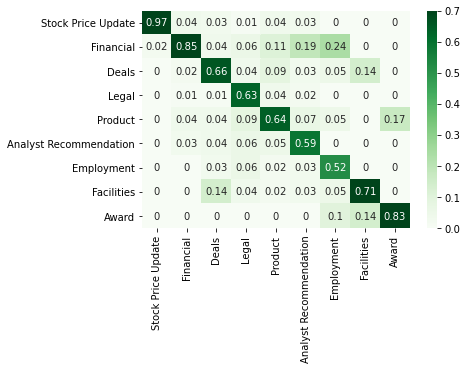

In [777]:
data = {'Stock Price Update': [9.74736842e-01,  1.54385965e-02, 7.01754386e-04, 7.01754386e-04, 2.10526316e-03, 4.21052632e-03, 1.40350877e-03, 0.00000000e+00, 7.01754386e-04],
        'Financial': [0.04294479,0.852760736196319, 0.01840491, 0.01226994, 0.04294479, 0.03067485, 0.,0.         ,0.    ],
        'Deals': [0.02816901 ,0.04225352, 0.66197183, 0.01408451, 0.04225352, 0.04225352, 0.02816901,0.14084507, 0.        ],
        'Legal': [0.01492537 ,      0.05970149, 0.04477612, 0.62686567, 0.08955224, 0.05970149, 0.05970149, 0.04477612, 0.   ],
        'Product': [0.03571429,  0.10714286, 0.08928571, 0.03571429, 0.64285714, 0.05357143, 0.01785714, 0.01785714, 0.   ],
        'Analyst Recommendation': [0.03389831,       0.18644068, 0.03389831, 0.01694915, 0.06779661, 0.59322034, 0.03389831, 0.03389831, 0.],
        'Employment': [0.     , 0.23809524,     0.04761905 , 0.   ,      0.04761905, 0.    ,     0.52380952, 0.04761905, 0.0952381],
        'Facilities': [0.   , 0.       ,       0.14285714, 0.   ,      0.    ,     0.     ,    0., 0.71428571 , 0.14285714  ],
        'Award': [0.    , 0.        ,      0.      ,   0.    ,     0.16666667 , 0.      ,   0., 0.      ,   0.83333333]}


index=['Stock Price Update', 'Financial', 'Deals', 'Legal', 'Product', 'Analyst Recommendation', 'Employment', 'Facilities', 'Award']
df = pd.DataFrame(data, index=index)
#df['Sum']=df.sum()
#df.set_index(index, inplace=True)
print(df)
plt.figure()
sns.heatmap(df.round(2), annot=True, vmax=0.7, cmap='Greens')
plt.show()

CLASSIFICATION INTO CATEGORIES OF ALL THE ARTICLES